# RED-TILING
This notebook will contains all the code to analyze the red tiling inputs and the results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from script import *
import subprocess
import time
import os

# Solver

In [41]:
data_folder = "resources/"
solver_folder = "solvers/"

# Select database here
data_file = "input_pdf.db"
# Select solver here
solver_file = "basicSolver.lp"

data = f"{data_folder}{data_file}"
solver = f"{solver_folder}{solver_file}"

## 1. Input

We will start by loading the input puzzle and displaying it.

Instance input_pdf.db:
n = 6, m = 4


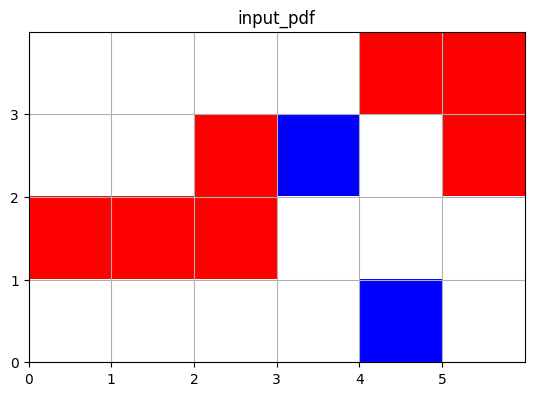

In [42]:
# print the database instance
print(f"Instance {data_file}:")
board, pieces = read_db_file(data)
display_board(board, data_file)

Then, we will display the available pieces.

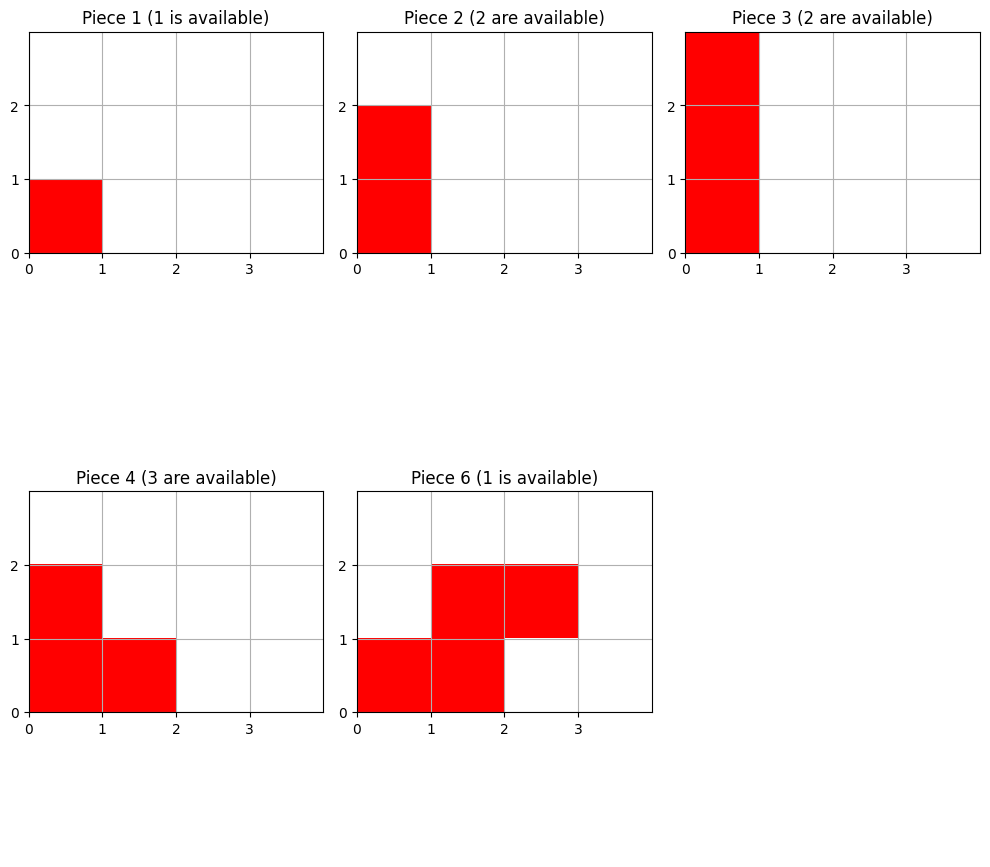

In [43]:
display_pieces(pieces)

## 2. Solution
Here, we will call clingo and find the solution to the puzzle.

- If there is a solution, we will display it. (If there are multiple solutions, we will display the first one and mention the number of solutions)
- If there is no solution, we will display a message saying unsat.

Solving...
Solution found:


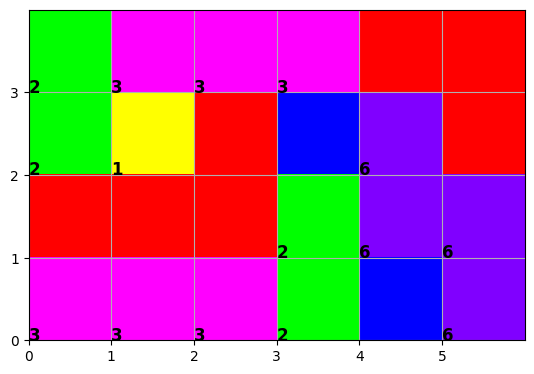

In [44]:
command = f"clingo {solver} {data} --verbose=0"

print("Solving...")
output = subprocess.run(command.split(), capture_output=True, text=True)

output = output.stdout    

if "UNSATISFIABLE" in output:
    print("No solution found.")
else:
    # Print the solution
    print("Solution found:")
    solutions = output.split("\n")[0].split(" ")

    new_board = add_solutions_to_board(board, solutions)

    display_board(new_board, "")


# Generator 

## 1. parametrized generator

In [45]:
input = "genInput.db"
gen = "param_generator.lp"

seed = int(time.time())

generator = f"{solver_folder}/{gen}"
gen_input = f"{data_folder}/{input}"

['blue(-1,-1)', 'red(-1,-1)', 'params(5,5,2)', 'one_sol(1,3,2)', 'two_sol(2,0,0,0,0,1)', 'two_sol(2,0,1,0,1,1)', 'two_sol(2,0,2,0,2,1)', 'two_sol(2,0,3,0,3,1)', 'two_sol(2,0,4,1,4,2)', 'two_sol(2,0,0,2,0,3)', 'two_sol(2,0,1,2,1,3)', 'two_sol(2,0,2,2,2,3)', 'two_sol(2,90,3,3,4,3)', 'blue(4,2)', 'blue(3,3)', 'red(4,0)', 'red(0,4)', 'red(1,4)', 'red(2,4)', 'red(3,4)', 'red(4,4)']


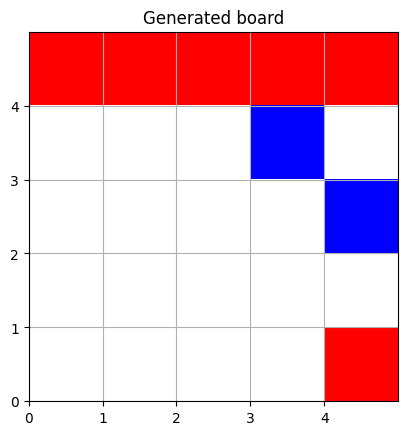

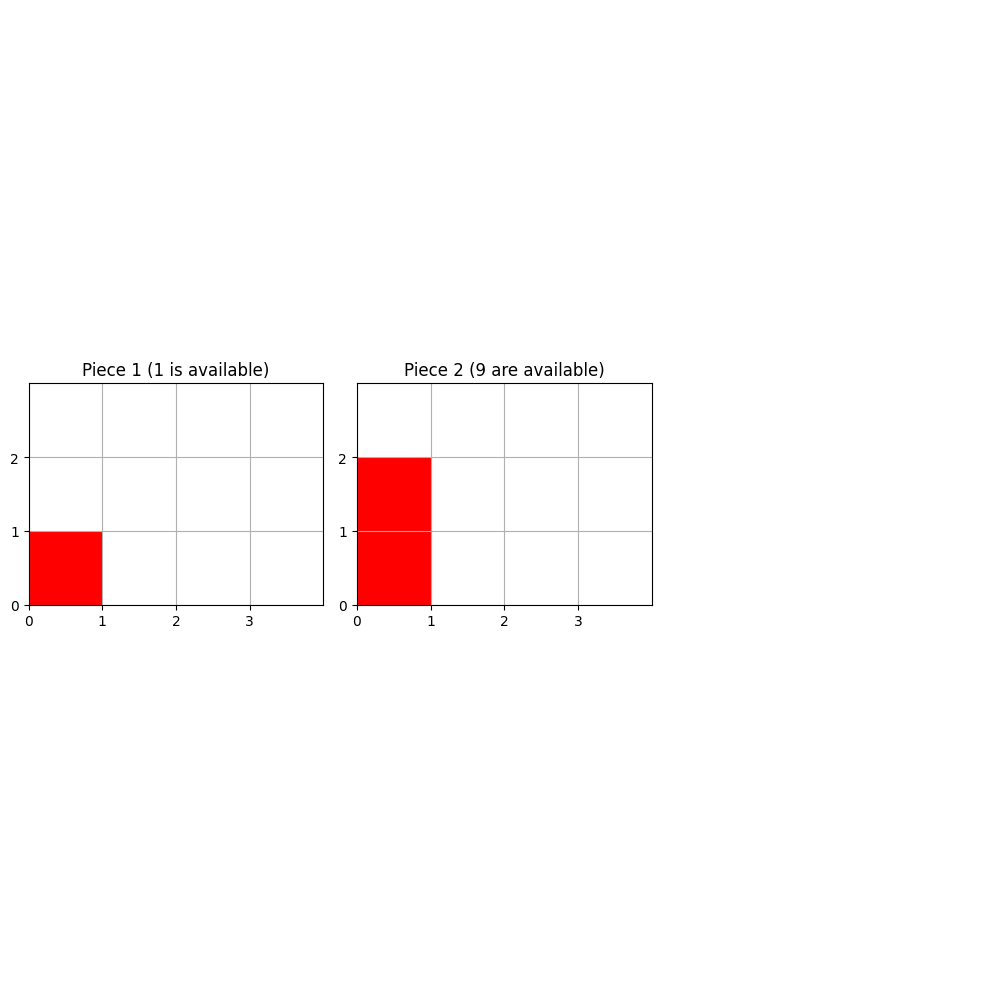

In [46]:
command = f"clingo -n 1 --rand-freq=1 --seed={seed} {generator} {gen_input}  --verbose=0"

output = subprocess.run(command.split(), capture_output=True, text=True)
output = output.stdout

if "UNSATISFIABLE" in output or "UNKOWN" in output:
    print("An error occured.")
else:
    predicates = output.split("\n")[0].split(" ")
    print(predicates)

    board, pieces, solver_input = read_generated_board(predicates)
    
    display_board(board, "Generated board")

    display_pieces(pieces)

## 2. Random generator

In [47]:
random_gen = "random_generator.lp"
seed = int(time.time())

random_generator = f"{solver_folder}/{random_gen}"

['blue(-1,-1)', 'red(-1,-1)', 'params(3,9,3)', 'three_sol(4,90,0,7,1,7,0,8)', 'four_sol(7,0,0,2,1,2,1,1,2,1)', 'four_sol(8,180,1,4,2,4,2,3,2,2)', 'four_sol(8,180,1,8,2,8,2,7,2,6)', 'four_sol(9,90,0,0,0,1,1,0,2,0)', 'four_sol(10,180,0,5,1,5,1,6,2,5)', 'red(0,3)', 'red(1,3)', 'red(0,4)', 'red(0,6)']


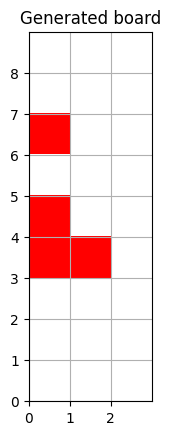

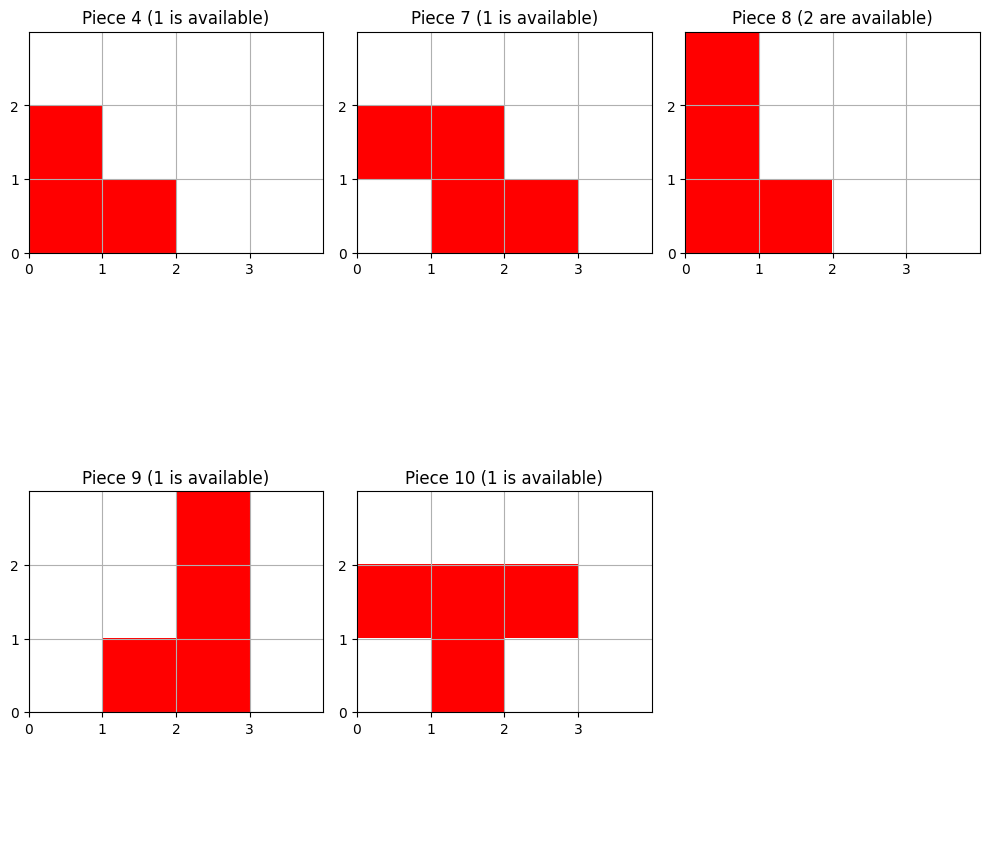

In [48]:
command = (
    f"clingo -n 1 --rand-freq=1 --seed={seed} {random_generator}  --verbose=0"
)

output = subprocess.run(command.split(), capture_output=True, text=True)
output = output.stdout

if "UNSATISFIABLE" in output or "UNKOWN" in output:
    print("An error occured.")
else:
    predicates = output.split("\n")[0].split(" ")
    print(predicates)

    board, pieces, solver_input = read_generated_board(predicates)

    display_board(board, "Generated board")

    display_pieces(pieces)

['params(3,9,3)', 'four_sol(9,90,0,0,0,1,1,0,2,0)']


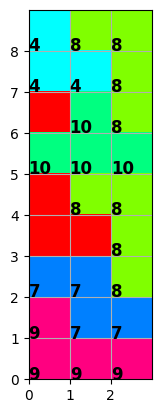

In [49]:
l = [predicate for predicate in predicates if len(predicate.split('9,')) != 1]
print(l)
new_board = add_solutions_to_board(board, predicates)

display_board(new_board, "")

# Analysis

To do this, we will have to generate a dataset for basic solver and minPiecesolver. The dataset will be generated using the file `gen.txt` and the parametrized generator.

The dataset contains instance with varying number of pieces and red cells. The number of red cells is determined to keep the % of red cells on the grid at 42%. All the blue cells are fixed to 0 in this dataset since we are only interested in the size of the instance.

## 1. Basic Solver

Instance from 3X3 to 30X30.

===================== GENERATE INSTANCE =====================
Size: 3x3, Red: 3, Blue: 0, Pieces: 25, Pieces to add: 5.


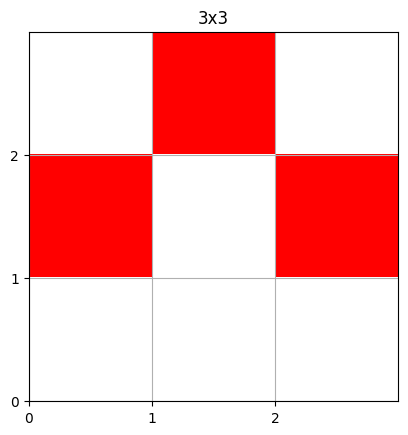

===================== GENERATE INSTANCE =====================
Size: 4x4, Red: 6, Blue: 0, Pieces: 25, Pieces to add: 5.


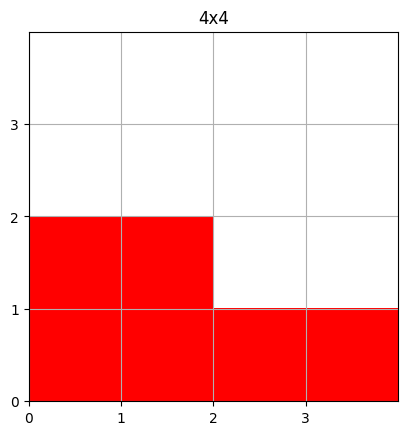

===================== GENERATE INSTANCE =====================
Size: 5x5, Red: 10, Blue: 0, Pieces: 25, Pieces to add: 5.


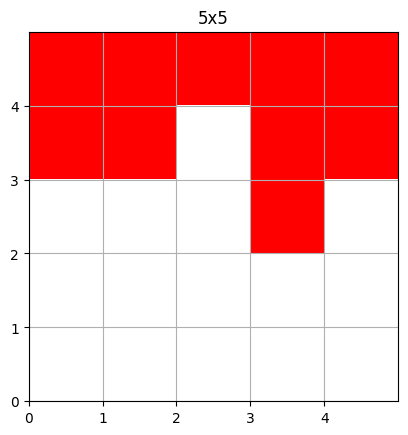

===================== GENERATE INSTANCE =====================
Size: 6x6, Red: 15, Blue: 0, Pieces: 25, Pieces to add: 5.


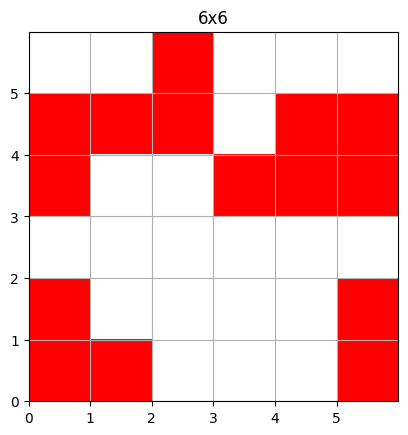

===================== GENERATE INSTANCE =====================
Size: 7x7, Red: 20, Blue: 0, Pieces: 50, Pieces to add: 10.


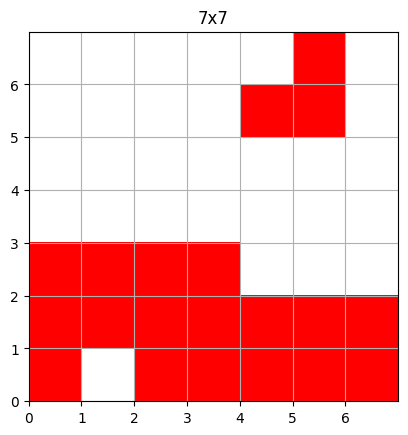

===================== GENERATE INSTANCE =====================
Size: 8x8, Red: 26, Blue: 0, Pieces: 50, Pieces to add: 10.


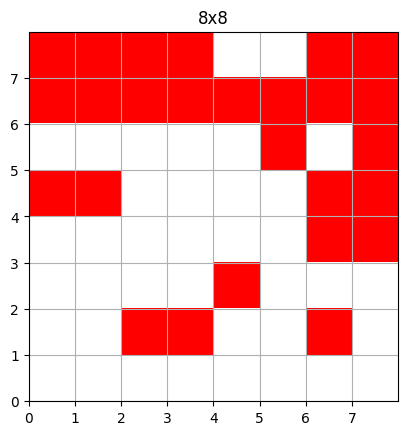

===================== GENERATE INSTANCE =====================
Size: 9x9, Red: 34, Blue: 0, Pieces: 50, Pieces to add: 10.


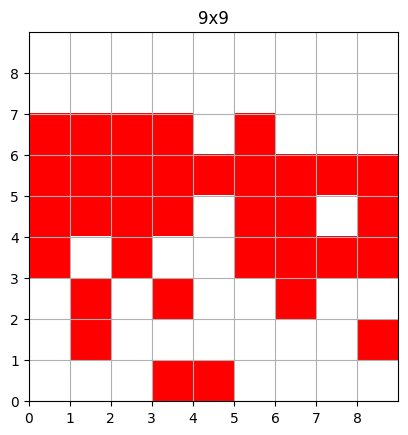

===================== GENERATE INSTANCE =====================
Size: 10x10, Red: 42, Blue: 0, Pieces: 50, Pieces to add: 10.


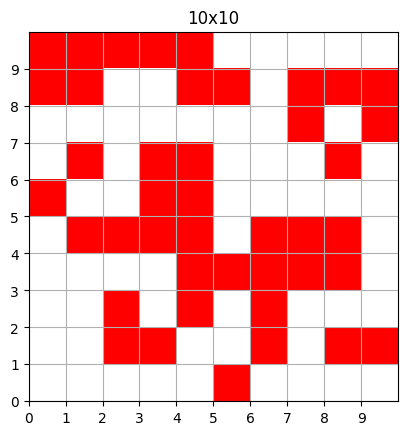

===================== GENERATE INSTANCE =====================
Size: 11x11, Red: 50, Blue: 0, Pieces: 50, Pieces to add: 10.


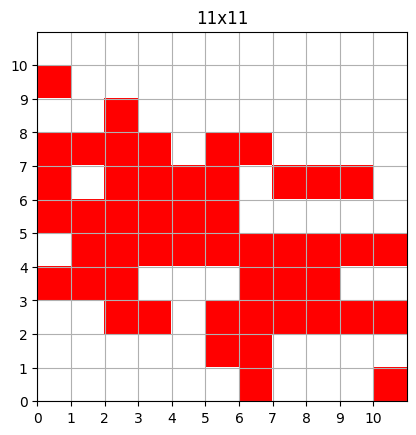

===================== GENERATE INSTANCE =====================
Size: 12x12, Red: 60, Blue: 0, Pieces: 50, Pieces to add: 10.


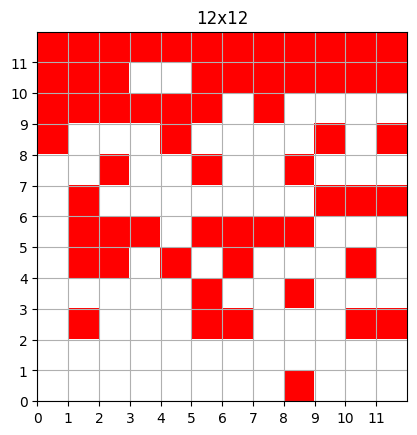

===================== GENERATE INSTANCE =====================
Size: 13x13, Red: 70, Blue: 0, Pieces: 50, Pieces to add: 10.


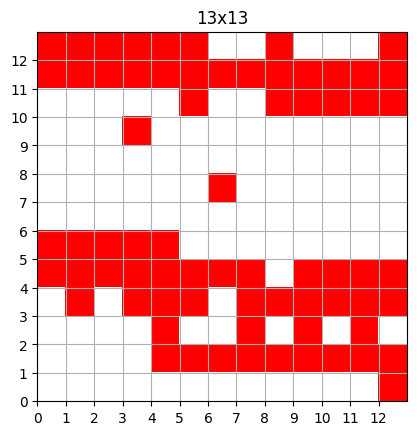

===================== GENERATE INSTANCE =====================
Size: 14x14, Red: 82, Blue: 0, Pieces: 50, Pieces to add: 10.


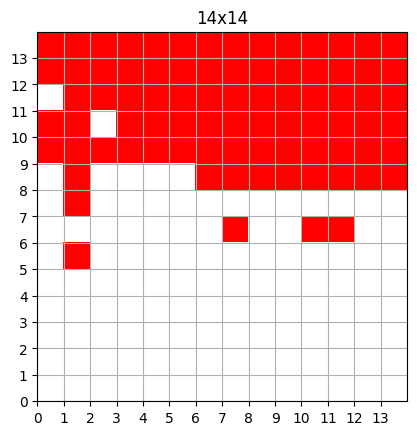

===================== GENERATE INSTANCE =====================
Size: 15x15, Red: 94, Blue: 0, Pieces: 50, Pieces to add: 10.


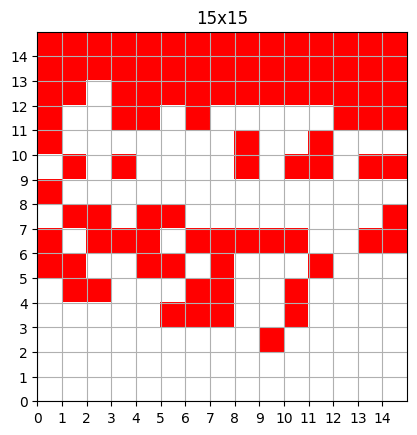

===================== GENERATE INSTANCE =====================
Size: 20x20, Red: 168, Blue: 0, Pieces: 100, Pieces to add: 20.


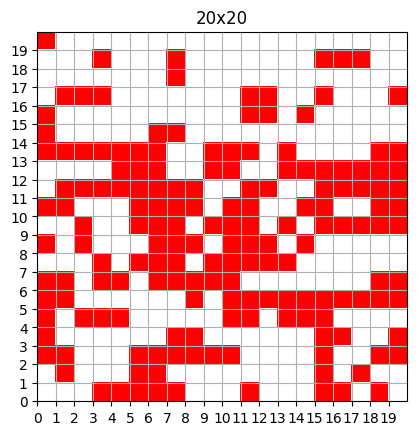

===================== GENERATE INSTANCE =====================
Size: 25x25, Red: 262, Blue: 0, Pieces: 100, Pieces to add: 20.


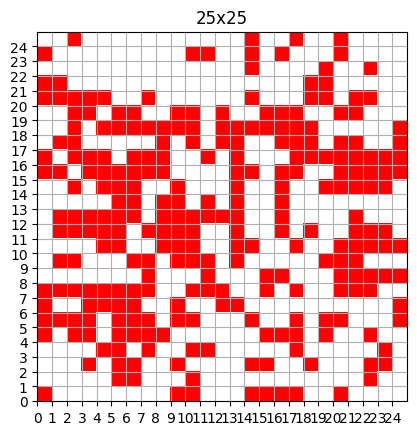

===================== GENERATE INSTANCE =====================
Size: 30x30, Red: 378, Blue: 0, Pieces: 100, Pieces to add: 20.


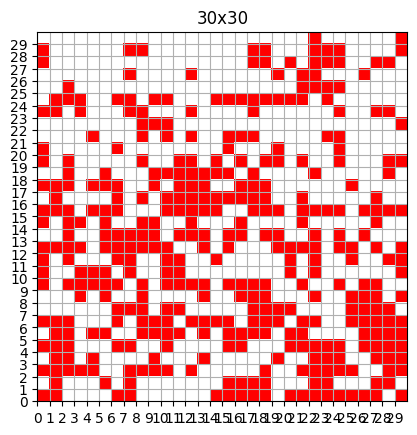

In [50]:
# Generate dataset

# clear folder but keep gen.txt
for file in os.listdir("resources/timeAnalysis"):
    if file.endswith(".db"):
        os.remove(f"resources/timeAnalysis/{file}")

gen_param = []
with open("resources/timeAnalysis/gen.txt", 'r') as f:
    for line in f:
        if line[0] == '#':
            continue
        # Transform each value in the string to an integer
        gen_param.append([int(x) for x in line.split()])

for param in gen_param:
    if len(param) == 0:
        continue
    generate_instance(param)

Now that we have the dataset, we will run clingo on all the instances with the basic solver and save the time taken on each instance.

Finally, the time taken on each instance will be stored in a CSV file.

In [52]:
# Parse the generated instances and add the time taken and info to a pandas dataframe.

# create a list of all the files in the resources folder
files = os.listdir("resources/timeAnalysis/")
# filter out the files that are not .db files
files = [file for file in files if file.endswith(".db")]

basic = "solvers/basicSolver.lp"

# create an empty dataframe
df = pd.DataFrame()
for file in files:
    # read the file
    size, red, blue = file.split("x")[1].split(".")[:-1]        
    time_basic = run_solver(basic, f"resources/timeAnalysis/{file}")

    # create a dictionary with the data
    data = {
        "size": [int(size)**2],
        "red": [red],
        "blue": [blue],
        "time_basic": [time_basic],
    }
    tmp_df = pd.DataFrame(data)
    # Add tmp_df to the dataframe
    df = pd.concat([df, tmp_df])


In [53]:
display(df)

# Save the dataframe to a csv file
df.to_csv("resources/timeAnalysis/time_analysis.csv", index=False)

,size,red,blue,time_basic
0,9,3,0,0.008
0,16,6,0,0.011
0,25,10,0,0.014
0,36,15,0,0.019
0,49,20,0,0.026
0,64,26,0,0.032
0,81,34,0,0.042
0,100,42,0,0.054
0,121,50,0,0.070
0,144,60,0,0.084


[]

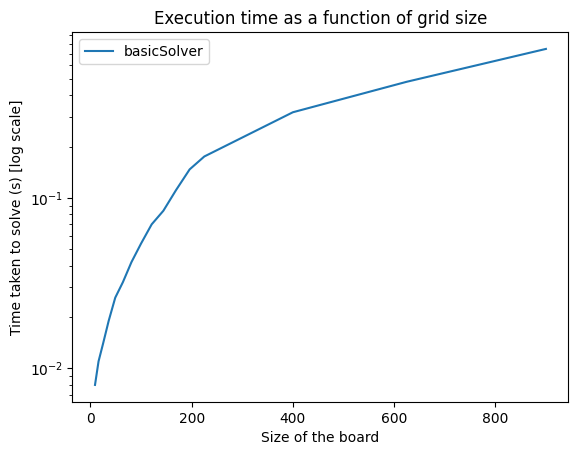

In [3]:
# Plot the data

df = pd.read_csv("resources/timeAnalysis/time_analysis.csv")
# plot df with log scale on y axis
plt.figure()
plt.plot(df["size"], df["time_basic"], label="basicSolver")
plt.yscale("log")
plt.xlabel("Size of the board")
plt.ylabel("Time taken to solve (s) [log scale]")
plt.legend()
plt.title("Execution time as a function of grid size")
plt.plot()

We can see that the growth of the time taken with the basic solver is exponential.

## 2. MinPiece Solver
Here, we will run this solver on only a part of the dataset since this solver takes much more time to run.

In [55]:
# Parse the generated instances and add the time taken and info to a pandas dataframe.

# create a list of all the files in the resources folder
files = os.listdir("resources/timeAnalysis/")
# filter out the files that are not .db files
files = [file for file in files if file.endswith(".db")]

min_solver = "solvers/minPiecesSolver.lp"

# create an empty dataframe
df = pd.DataFrame()
for file in files[:6]:
    print(f"Current file: {file}")
    # read the file
    size_x = file.split("x")[0]
    size_y, red, blue = file.split("x")[1].split(".")[:-1]
    time_min = run_solver(min_solver, f"resources/timeAnalysis/{file}")

    # create a dictionary with the data
    data = {
        "size": [int(size_x) * int(size_y)],
        "red": [red],
        "blue": [blue],
        "time_min": [time_min],
    }
    tmp_df = pd.DataFrame(data)
    # Add tmp_df to the dataframe
    df = pd.concat([df, tmp_df])

Current file: 3x3.3.0.db
Current file: 4x4.6.0.db
Current file: 5x5.10.0.db
Current file: 6x6.15.0.db
Current file: 7x7.20.0.db
Current file: 8x8.26.0.db


In [56]:
display(df)

# Save the dataframe to a csv file
df.to_csv("resources/timeAnalysis/time_analysis_min.csv", index=False)

,size,red,blue,time_min
0,9,3,0,0.006
0,16,6,0,0.010
0,25,10,0,0.015
0,36,15,0,0.032
0,49,20,0,8.282
0,64,26,0,19.838


[]

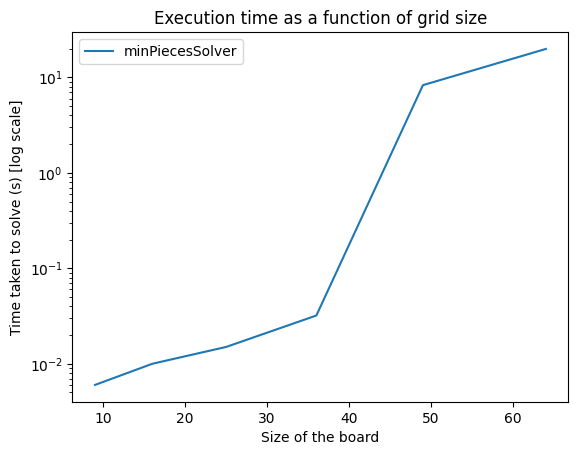

In [4]:
# Plot the data

df_min = pd.read_csv("resources/timeAnalysis/time_analysis_min.csv")
# Order by size
df_min = df_min.sort_values("size")
# plot df with log scale on y axis
plt.figure()
plt.plot(df_min["size"], df_min["time_min"], label="minPiecesSolver")
plt.yscale("log")
plt.xlabel("Size of the board")
plt.ylabel("Time taken to solve (s) [log scale]")
plt.legend()
plt.title("Execution time as a function of grid size")
plt.plot()

We can see that the growth of the time taken by the minPiece solver is also exponential.

## 3. Analysis with both solvers

[]

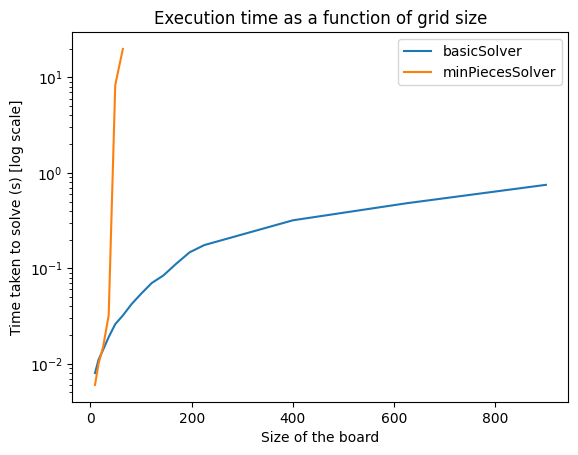

In [62]:
# Plot the data

df_min = pd.read_csv("resources/timeAnalysis/time_analysis_min.csv")
df_basic = pd.read_csv("resources/timeAnalysis/time_analysis.csv")
# Order by size
df_min = df_min.sort_values("size")
df_basic = df_basic.sort_values("size")
# plot df with log scale on y axis
plt.figure()
plt.plot(df_basic["size"], df_basic["time_basic"], label="basicSolver")
plt.plot(df_min["size"], df_min["time_min"], label="minPiecesSolver")
plt.yscale("log")
plt.xlabel("Size of the board")
plt.ylabel("Time taken to solve (s) [log scale]")
plt.legend()
plt.title("Execution time as a function of grid size")
plt.plot()

We can see that the growth of the time taken by both solver is exponential and the minPiece solver is much slower than the basic solver.

# Difficulty of instances

To analyze the difficulty of the instances, we will use the function `compute_difficulty` in scipt.py. This function will compute the time taken by the basic solver and classify the instances into 5 categories based on the time taken.
- Very Easy ($<0.02s$)
- Easy ($0.01 <= t < 0.0.5$)
- Medium ($0.05 <= t < 0.1$)
- Hard ($0.1 <= t < 0.5$)
- Very Hard ($>=0.5$)


Remark: Another possibility is to use the minPiece solver to classify the instances. However, this solver can take a lot of time to run some instances.

In [6]:
# Add the diffulty to the dataframe

# create a list of all the files in the resources folder
files = os.listdir("resources/timeAnalysis/")
# filter out the files that are not .db files
files = [file for file in files if file.endswith(".db")]


# create an empty dataframe
df = pd.DataFrame()

for file in files:
    # read the file
    size, red, blue = file.split("x")[1].split(".")[:-1]
    time, difficulty = compute_difficulty(f"resources/timeAnalysis/{file}")

    # create a dictionary with the data
    data = {
        "size": [int(size)**2],
        "red": [int(red)],
        "blue": [int(blue)],
        "time": [time],
        "difficulty": [difficulty],
    }
    tmp_df = pd.DataFrame(data)
    # Add tmp_df to the dataframe
    df = pd.concat([df, tmp_df])



In [9]:
display(df)

# save the dataframe to a csv file
df.to_csv("resources/timeAnalysis/time_analysis_difficulty.csv", index=False)

,size,red,blue,time,difficulty
0,9,3,0,0.012,Easy
0,16,6,0,0.015,Easy
0,25,10,0,0.023,Easy
0,36,15,0,0.027,Easy
0,49,20,0,0.041,Easy
0,64,26,0,0.050,Medium
0,81,34,0,0.057,Medium
0,100,42,0,0.075,Medium
0,121,50,0,0.117,Hard
0,144,60,0,0.153,Hard
